<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:

**Student ID**:



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error 
import matplotlib.pyplot as plt 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [8]:
boston=pd.read_csv('f://Boston.csv')






print("Features in the dataset:")
print(boston.columns)

# Print the shape of the dataset
print("\nShape of the dataset:")
print(boston.shape)


Features in the dataset:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Shape of the dataset:
(506, 14)


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [9]:

data = pd.read_csv('f://Boston.csv')

# Inspect the DataFrame
print(data.head())  # Display the first few rows of the DataFrame
print(data.columns)  # Display the column names of the DataFrame

# Dropping the target variable column
X = data.drop('MEDV', axis=1)  # Drop the column containing the target variable
y = data['MEDV']  # Target variable

# Splitting the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the training set
y_train_pred = model.predict(X_train)

# Predicting on the test set
y_test_pred = model.predict(X_test)

# Calculating R^2 for both train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating RMSE for both train and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Coefficients of the linear regression model
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})

# Printing the results
print("Train R^2:", r2_train)
print("Test R^2:", r2_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("\nCoefficients:")
print(coefficients)

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
Train R^2: 0.7508856358979673
Test R^2: 0.6687594935356295
Train RMSE: 4.6520331848801675
Test RMSE: 4.928602182665355

Coefficients:
    feature  coefficient
0      CRIM    -0.113056
1        ZN     0.030110
2     I

**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

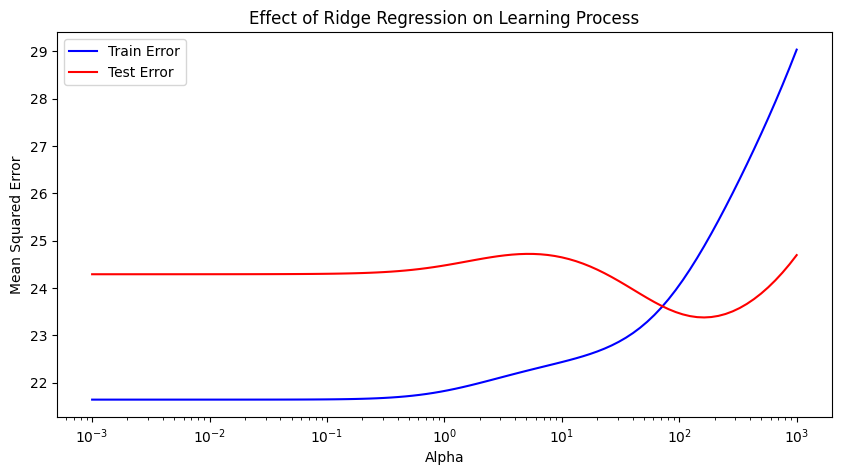

In [15]:

# Set alphas parameter
alphas = np.geomspace(1e-3, 1e3, 100)


# Initialize lists to store results
train_errors = []
test_errors = []

# Iterate over alpha values
for alpha in alphas:
    # Create Ridge regression model
    model = Ridge(alpha=alpha)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on training set
    y_train_pred = model.predict(X_train)
    
    # Predict on test set
    y_test_pred = model.predict(X_test)
    
    # Calculate train and test errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    # Append errors to lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(alphas, train_errors, label='Train Error', color='blue')
plt.plot(alphas, test_errors, label='Test Error', color='red')
plt.title('Effect of Ridge Regression on Learning Process')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.legend()
plt.show()


 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

<module 'matplotlib.pyplot' from 'c:\\Users\\RGS-CO\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

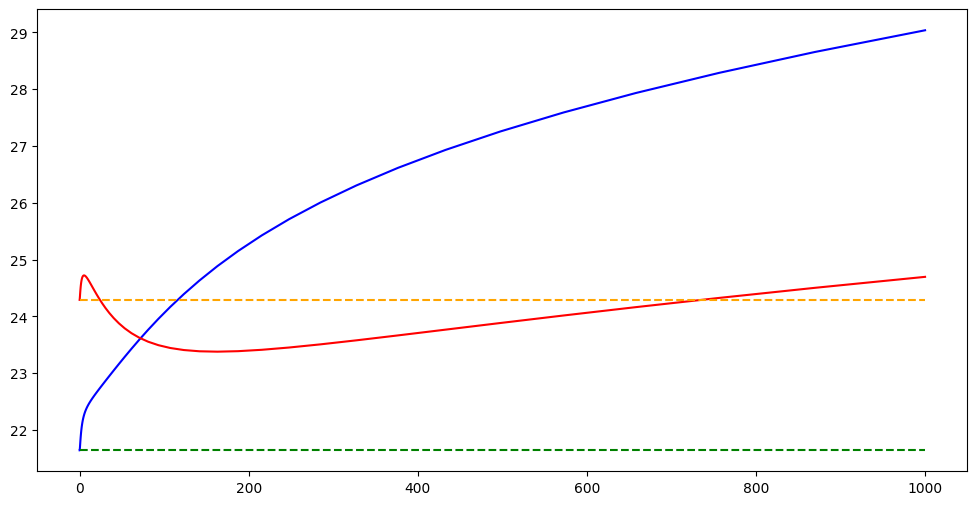

In [17]:

# Set alphas parameter
alphas = np.geomspace(1e-3, 1e3, 100)

# Initialize lists to store results
train_errors_ridge = []
test_errors_ridge = []
train_errors_linear = []
test_errors_linear = []
coefficients_ridge = []

# Initialize lists to store the number of not-considered features
not_considered_features = []

# Iterate over alpha values
for alpha in alphas:
    # Ridge Regression
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)
    y_train_pred_ridge = model_ridge.predict(X_train)
    y_test_pred_ridge = model_ridge.predict(X_test)
    train_error_ridge = mean_squared_error(y_train, y_train_pred_ridge)
    test_error_ridge = mean_squared_error(y_test, y_test_pred_ridge)
    train_errors_ridge.append(train_error_ridge)
    test_errors_ridge.append(test_error_ridge)
    coefficients_ridge.append(model_ridge.coef_)
    
    # Counting the number of not-considered features
    not_considered = sum(abs(model_ridge.coef_) < 1e-10)
    not_considered_features.append(not_considered)

    # Linear Regression
    model_linear = LinearRegression()
    model_linear.fit(X_train, y_train)
    y_train_pred_linear = model_linear.predict(X_train)
    y_test_pred_linear = model_linear.predict(X_test)
    train_error_linear = mean_squared_error(y_train, y_train_pred_linear)
    test_error_linear = mean_squared_error(y_test, y_test_pred_linear)
    train_errors_linear.append(train_error_linear)
    test_errors_linear.append(test_error_linear)

# Plotting MSE for train and test versus α
plt.figure(figsize=(12, 6))
plt.plot(alphas, train_errors_ridge, label='Ridge Train Error', color='blue')
plt.plot(alphas, test_errors_ridge, label='Ridge Test Error', color='red')
plt.plot(alphas, train_errors_linear, label='Linear Train Error', color='green', linestyle='--')
plt.plot(alphas, test_errors_linear, label='Linear Test Error', color='orange', linestyle='--')
plt


**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?


Linear Regression:
MSE: 24.291119474973705
R^2: 0.6687594935356295
Coefficients:
CRIM : -0.11305592398537832
ZN : 0.030110464145646023
INDUS : 0.04038072041333649
CHAS : 2.7844382035079183
NX : -17.20263339178114
RM : 4.438835199513049
AGE : -0.006296362210984044
DIS : -1.4478653685307892
RAD : 0.2624297355850866
TAX : -0.010646786275308184
PTRATIO : -0.9154562404680755
B : 0.012351334729969474
LSTAT : -0.5085714244487942

Linear Regression:
MSE: 24.291119474973705
R^2: 0.6687594935356295
Coefficients:
CRIM : -0.11305592398537832
ZN : 0.030110464145646023
INDUS : 0.04038072041333649
CHAS : 2.7844382035079183
NX : -17.20263339178114
RM : 4.438835199513049
AGE : -0.006296362210984044
DIS : -1.4478653685307892
RAD : 0.2624297355850866
TAX : -0.010646786275308184
PTRATIO : -0.9154562404680755
B : 0.012351334729969474
LSTAT : -0.5085714244487942

Linear Regression:
MSE: 24.291119474973705
R^2: 0.6687594935356295
Coefficients:
CRIM : -0.11305592398537832
ZN : 0.030110464145646023
INDUS : 0.

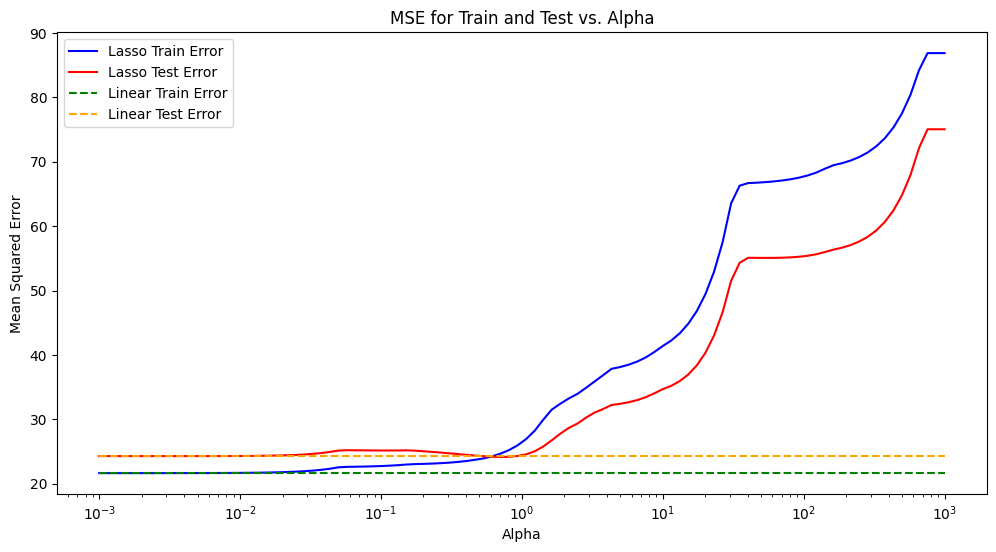

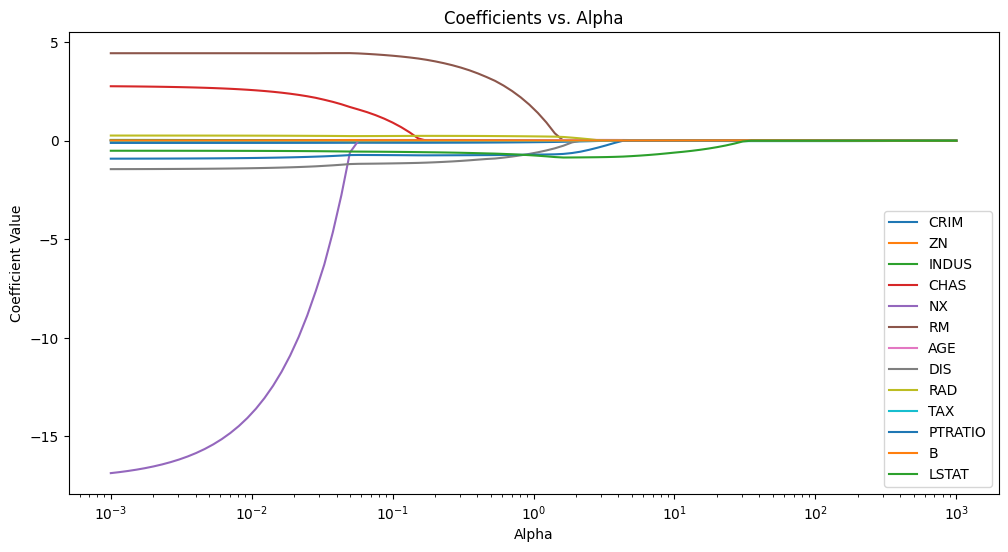

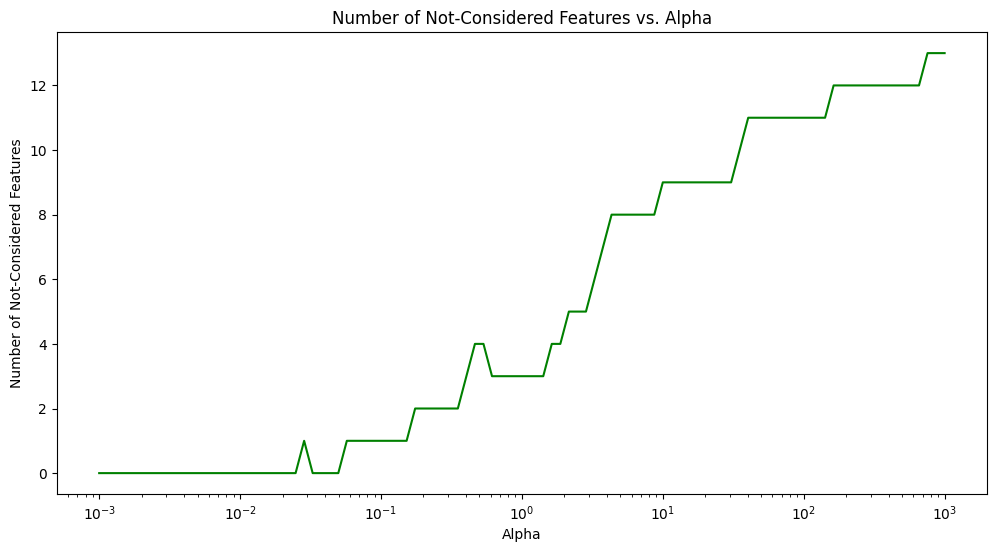


Lasso Regression with Optimal Alpha:
Optimal Alpha: 0.7054802310718645
MSE: 24.153582719268012
R^2: 0.6706349832455358
Coefficients:
CRIM : -0.08627423415370325
ZN : 0.03083245882910183
INDUS : -0.0
CHAS : 0.0
NX : -0.0
RM : 2.518059528859686
AGE : 0.0059991695615361825
DIS : -0.803466590564973
RAD : 0.22941841651013872
TAX : -0.012711857065039038
PTRATIO : -0.7207057736121465
B : 0.011874083752022575
LSTAT : -0.6888918710198504


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Set alphas parameter
alphas = np.geomspace(1e-3, 1e3, 100)

# Initialize lists to store results
train_errors_lasso = []
test_errors_lasso = []
train_errors_linear = []
test_errors_linear = []
coefficients_lasso = []

# Initialize lists to store the number of not-considered features
not_considered_features_lasso = []

# Iterate over alpha values
for alpha in alphas:
    # Lasso Regression
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train)
    y_train_pred_lasso = model_lasso.predict(X_train)
    y_test_pred_lasso = model_lasso.predict(X_test)
    train_error_lasso = mean_squared_error(y_train, y_train_pred_lasso)
    test_error_lasso = mean_squared_error(y_test, y_test_pred_lasso)
    train_errors_lasso.append(train_error_lasso)
    test_errors_lasso.append(test_error_lasso)
    coefficients_lasso.append(model_lasso.coef_)
    
    # Counting the number of not-considered features
    not_considered = sum(abs(model_lasso.coef_) < 1e-10)
    not_considered_features_lasso.append(not_considered)

    # Linear Regression
    model_linear = LinearRegression()
    model_linear.fit(X_train, y_train)
    y_train_pred_linear = model_linear.predict(X_train)
    y_test_pred_linear = model_linear.predict(X_test)
    train_error_linear = mean_squared_error(y_train, y_train_pred_linear)
    test_error_linear = mean_squared_error(y_test, y_test_pred_linear)
    train_errors_linear.append(train_error_linear)
    test_errors_linear.append(test_error_linear)
    
    # Evaluate Linear regression model
    mse_linear = mean_squared_error(y_test, y_test_pred_linear)
    r2_linear = r2_score(y_test, y_test_pred_linear)

    # Printing results for linear regression
    print("\nLinear Regression:")
    print("MSE:", mse_linear)
    print("R^2:", r2_linear)
    print("Coefficients:")
    for i, col in enumerate(X.columns):
        print(col, ":", model_linear.coef_[i])

# Plotting MSE for train and test versus α
plt.figure(figsize=(12, 6))
plt.plot(alphas, train_errors_lasso, label='Lasso Train Error', color='blue')
plt.plot(alphas, test_errors_lasso, label='Lasso Test Error', color='red')
plt.plot(alphas, train_errors_linear, label='Linear Train Error', color='green', linestyle='--')
plt.plot(alphas, test_errors_linear, label='Linear Test Error', color='orange', linestyle='--')
plt.title('MSE for Train and Test vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.legend()
plt.show()

# Plotting coefficients versus α
plt.figure(figsize=(12, 6))
for i in range(len(X.columns)):
    plt.plot(alphas, [coefficients_lasso[j][i] for j in range(len(alphas))], label=X.columns[i])
plt.title('Coefficients vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.xscale('log')
plt.legend()
plt.show()

# Plotting the number of not-considered features versus α
plt.figure(figsize=(12, 6))
plt.plot(alphas, not_considered_features_lasso, color='green')
plt.title('Number of Not-Considered Features vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.xscale('log')
plt.show()

# Selecting the optimal value of α
min_test_error_index = np.argmin(test_errors_lasso)
optimal_alpha = alphas[min_test_error_index]

# Training Lasso regression model with the selected optimal α
model_optimal_lasso = Lasso(alpha=optimal_alpha)
model_optimal_lasso.fit(X_train, y_train)
y_test_pred_optimal_lasso = model_optimal_lasso.predict(X_test)

# Evaluate Lasso regression model
mse_optimal_lasso = mean_squared_error(y_test, y_test_pred_optimal_lasso)
r2_optimal_lasso = r2_score(y_test, y_test_pred_optimal_lasso)

# Printing results
print("\nLasso Regression with Optimal Alpha:")
print("Optimal Alpha:", optimal_alpha)
print("MSE:", mse_optimal_lasso)
print("R^2:", r2_optimal_lasso)
print("Coefficients:")
for i, col in enumerate(X.columns):
    print(col, ":", model_optimal_lasso.coef_[i])


**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

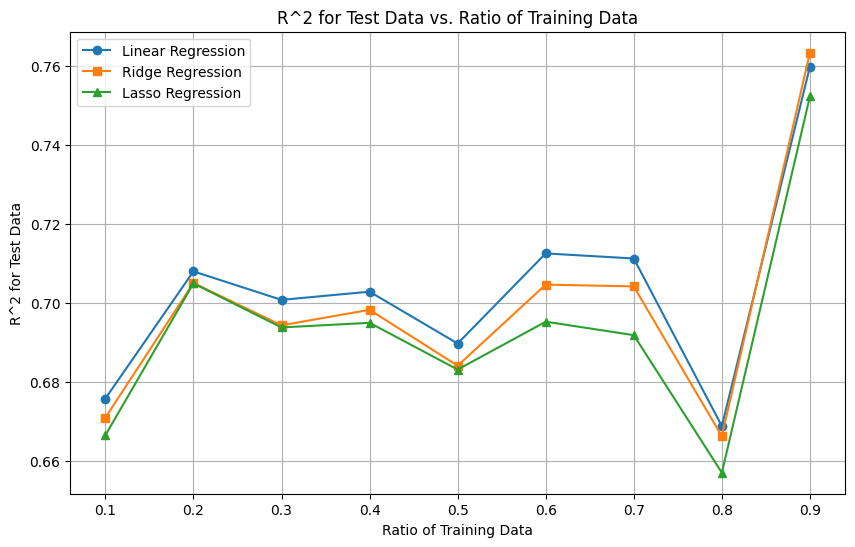

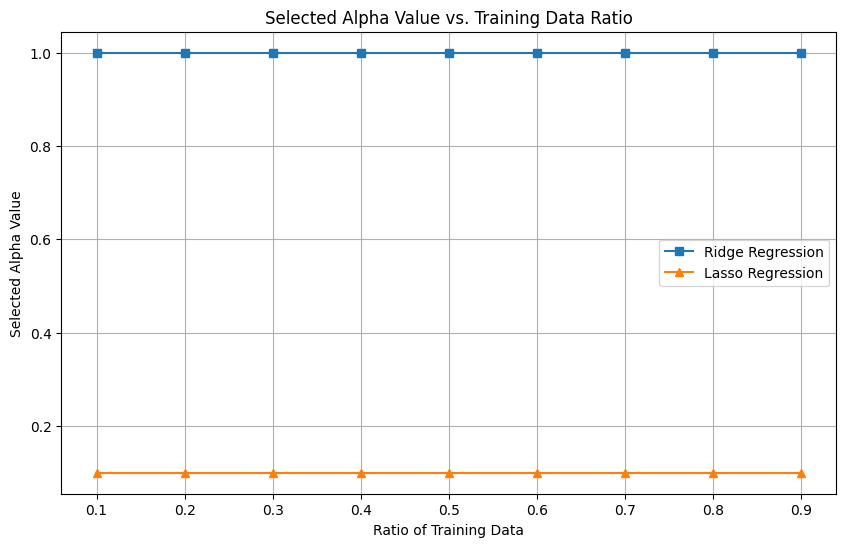

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

# Initialize ratios of training data
ratios = np.linspace(0.1, 0.9, 9)

# Initialize lists to store results
r2_linear = []
r2_ridge = []
r2_lasso = []
alpha_ridge = []
alpha_lasso = []

# Iterate over ratios
for ratio in ratios:
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)
    
    # Linear Regression
    model_linear = LinearRegression()
    model_linear.fit(X_train, y_train)
    y_test_pred_linear = model_linear.predict(X_test)
    r2_linear.append(r2_score(y_test, y_test_pred_linear))
    
    # Ridge Regression
    model_ridge = Ridge()
    model_ridge.fit(X_train, y_train)
    y_test_pred_ridge = model_ridge.predict(X_test)
    r2_ridge.append(r2_score(y_test, y_test_pred_ridge))
    alpha_ridge.append(model_ridge.alpha)
    
    # Lasso Regression
    model_lasso = Lasso(alpha=0.1)  # Example alpha value, adjust as needed
    model_lasso.fit(X_train, y_train)
    y_test_pred_lasso = model_lasso.predict(X_test)
    r2_lasso.append(r2_score(y_test, y_test_pred_lasso))
    alpha_lasso.append(0.1)  # Example alpha value used for Lasso, adjust as needed

# Plotting R^2 for test data versus ratio of training data
plt.figure(figsize=(10, 6))
plt.plot(ratios, r2_linear, label='Linear Regression', marker='o')
plt.plot(ratios, r2_ridge, label='Ridge Regression', marker='s')
plt.plot(ratios, r2_lasso, label='Lasso Regression', marker='^')
plt.title('R^2 for Test Data vs. Ratio of Training Data')
plt.xlabel('Ratio of Training Data')
plt.ylabel('R^2 for Test Data')
plt.legend()
plt.grid(True)
plt.show()

# Plotting selected α value versus training data ratio for Ridge and Lasso regression methods
plt.figure(figsize=(10, 6))
plt.plot(ratios, alpha_ridge, label='Ridge Regression', marker='s')
plt.plot(ratios, alpha_lasso, label='Lasso Regression', marker='^')
plt.title('Selected Alpha Value vs. Training Data Ratio')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha Value')
plt.legend()
plt.grid(True)
plt.show()
